# Visualize Ticker Features

This notebook loads and visualizes the features for a single ticker.

,Open,High,Low,Close,Volume,Volume_Prev,Dividends,Stock Splits,RSI,MACD,...,BB_Lower,BB_Middle,BB_Pband,SMA_20,SMA_50,SMA_100,SMA_200,EMA_100,EMA_200,analyst_targets
Date,,,,,,,,,,,,,,,,,,,,,
2025-05-28,166.160004,166.649994,164.520004,165.399994,1723700,2323100.0,0.0,0.0,59.354278,2.420451,...,152.099066,160.012499,0.840402,160.012499,157.215970,NaN,NaN,NaN,NaN,None
2025-05-29,165.919998,167.789993,165.110001,167.139999,2450400,1723700.0,0.0,0.0,61.541985,2.636358,...,152.241722,160.549500,0.896646,160.549500,157.281230,NaN,NaN,NaN,NaN,None
2025-05-30,166.919998,169.789993,165.339996,168.630005,5467800,2450400.0,0.0,0.0,63.360616,2.894333,...,152.504120,161.198500,0.927374,161.198500,157.389845,NaN,NaN,NaN,NaN,None
2025-06-02,167.820007,169.479996,166.259995,169.419998,2550100,5467800.0,0.0,0.0,64.323901,3.126485,...,152.586073,161.797500,0.913752,161.797500,157.526019,NaN,NaN,NaN,NaN,None
2025-06-03,169.089996,172.229996,168.639999,171.565002,1482955,2550100.0,0.0,0.0,66.870777,3.443853,...,152.507131,162.472750,0.956181,162.472750,157.707685,NaN,NaN,NaN,NaN,"{""current_price"": 171.565, ""median_target"": 19..."


Sector for ZTS: Healthcare


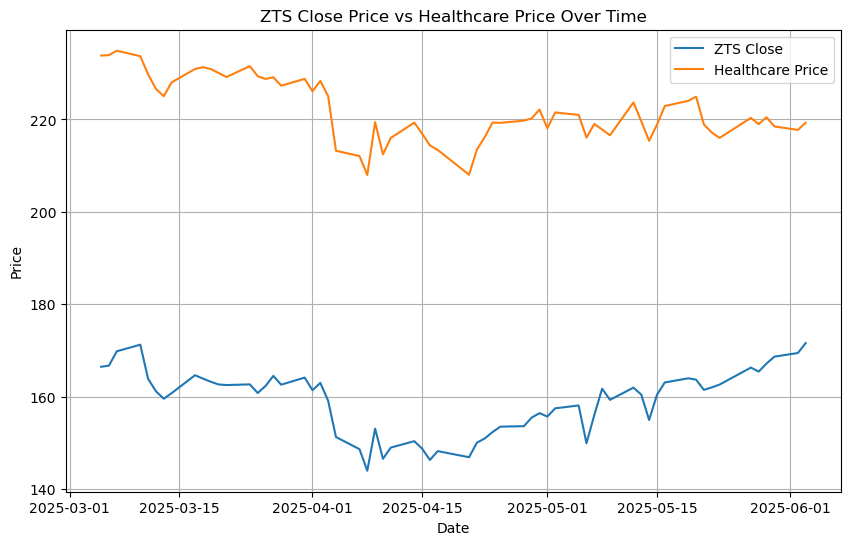

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the ticker's features from the Parquet file
ticker = 'ZTS'  # Change this to the desired ticker
df = pd.read_parquet(f'../data/ticker_features/{ticker}_features.parquet')

# Display the last few rows
display(df.tail())

# Load the sector mapping from JSON
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

# Get the sector for the ticker
sector = sector_dict.get(ticker, 'Unknown')
print(f"Sector for {ticker}: {sector}")

# Load the sector's Parquet file
sector_df = pd.read_parquet(f'../data/market_features/sectors/{sector}.parquet')

# Plot the ticker's 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label=f'{ticker} Close')

# Overlay the sector's 'price' data
plt.plot(sector_df.index, sector_df['price'], label=f'{sector} Price')

plt.title(f'{ticker} Close Price vs {sector} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()